## Ejercicio 6


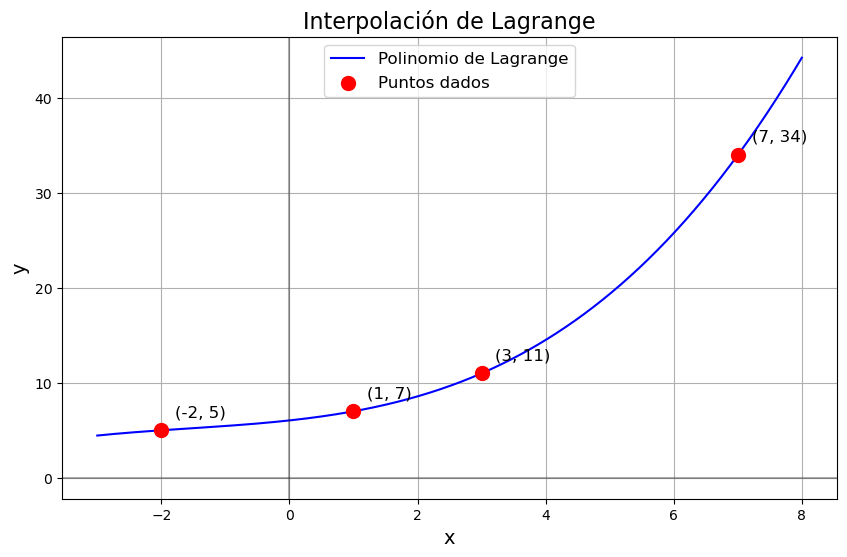

Polinomio de Lagrange:
L(x) = 43*x**3/1080 + 101*x**2/540 + 793*x/1080 + 1087/180

Forma estándar:
L(x) = 43/1080x^3 + 101/540x^2 + 793/1080x^1 + 1087/180


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Datos proporcionados
points = [(-2, 5), (1, 7), (3, 11), (7, 34)]
x_points, y_points = zip(*points)

# Función para calcular el polinomio de Lagrange
def lagrange_polynomial(x, points):
    n = len(points)
    result = 0

    for i in range(n):
        xi, yi = points[i]
        term = yi

        for j in range(n):
            if i != j:
                xj, _ = points[j]
                term *= (x - xj) / (xi - xj)

        result += term

    return result

# Calcular la forma simbólica del polinomio de Lagrange
x = sp.Symbol('x')
lagrange_expr = 0

for i in range(len(points)):
    xi, yi = points[i]
    term = yi

    for j in range(len(points)):
        if i != j:
            xj, _ = points[j]
            term *= (x - xj) / (xi - xj)

    lagrange_expr += term

# Simplificar la expresión
lagrange_expr_simplified = sp.expand(lagrange_expr)

# Crear un rango de valores x para graficar
x_range = np.linspace(-3, 8, 1000)
y_range = [lagrange_polynomial(xi, points) for xi in x_range]

# Graficar el polinomio de Lagrange y los puntos
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, 'b-', label='Polinomio de Lagrange')
plt.scatter(x_points, y_points, color='red', s=100, zorder=5, label='Puntos dados')

# Añadir etiquetas a los puntos
for i, (xi, yi) in enumerate(points):
    plt.annotate(f'({xi}, {yi})', (xi, yi), xytext=(10, 10),
                textcoords='offset points', fontsize=12)

plt.title('Interpolación de Lagrange', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.show()

# Mostrar la expresión del polinomio de Lagrange
print("Polinomio de Lagrange:")
print(f"L(x) = {lagrange_expr_simplified}")

# Convertir a forma estándar (ax³ + bx² + cx + d)
coeffs = sp.Poly(lagrange_expr_simplified, x).all_coeffs()
degree = len(coeffs) - 1

# Mostrar en forma estándar
standard_form = ""
for i, coef in enumerate(coeffs):
    power = degree - i
    if power > 0:
        standard_form += f"{coef}x^{power} + "
    else:
        standard_form += f"{coef}"

print("\nForma estándar:")
print(f"L(x) = {standard_form}")
#